In [16]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from tqdm import tqdm
from collections import Counter

In [2]:
Sent = pd.read_csv('sentiment_manual_500.csv')

In [4]:
Sent.head()

,Unnamed: 0,manual,Original_Comment
0,0,-,The new one sucks very hard to work on and cos...
1,1,=,Oh for the Morris minor
2,2,-,"imagine being set on ""owning a Chevy EV."" i s..."
3,3,=,Parts are made in china..but India wants them ...
4,4,=,"Why, why, why do reviewers always test the top..."


In [5]:
#https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def get_top_sentiment(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    top_label = config.id2label[ranking[0]]
    top_score = np.round(float(scores[ranking[0]]), 4)
    
    return top_label, top_score

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Using the function to apply on the DataFrame and create two new columns
Sent['model_sentiment'], Sent['Sentiment_Score'] = zip(*Sent['Original_Comment'].apply(get_top_sentiment))

In [7]:
Sent.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
Sent

,manual,Original_Comment,model_sentiment,Sentiment_Score
0,-,The new one sucks very hard to work on and cos...,negative,0.9584
1,=,Oh for the Morris minor,neutral,0.6779
2,-,"imagine being set on ""owning a Chevy EV."" i s...",negative,0.7292
3,=,Parts are made in china..but India wants them ...,neutral,0.7125
4,=,"Why, why, why do reviewers always test the top...",negative,0.8504
...,...,...,...,...
495,=,do the 5 cylinder engines have this carbon bui...,neutral,0.6628
496,+,"Now i can have an $80,000 coal powered car.......",positive,0.7973
497,-,It is a death trap if a truck hits you.,negative,0.8163
498,+,I have a lot of beautiful used engines and aut...,positive,0.9462


In [103]:
# Create a new DataFrame with two columns: original and preprocessed content
Combine = pd.DataFrame({
    'sentiment_label': Sent['model_sentiment'],
    'Manual_label': Sent['manual']
})

# Define a dictionary for mapping
label_mapping = {
    'neutral': '=',
    'negative': '-',
    'positive': '+'
}

# Apply the mapping to the sentiment_label column
Combine['sentiment_label'] = Combine['sentiment_label'].replace(label_mapping)

In [104]:
Combine

,sentiment_label,Manual_label
0,-,-
1,=,=
2,-,-
3,=,=
4,-,=
...,...,...
495,=,=
496,+,+
497,-,-
498,+,+


In [105]:
# Compute the accuracy by checking how often the predicted and manual labels match
accuracy = (Combine['sentiment_label'] == Combine['Manual_label']).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.20%


Loading the full Youtube dataset

In [11]:
# Loading the files
Abarth = pd.read_csv('Abarth.csv')
Fiat = pd.read_csv('Fiat.csv')
Tesla = pd.read_csv('Tesla.csv')
Mini = pd.read_csv('Mini.csv')
Volkswagen = pd.read_csv('Volkswagen.csv')
Peugeot = pd.read_csv('Peugeot.csv')

In [10]:
# Convert 'Comment_Content' column to string before applying sentiment analysis
Abarth['Comment_Content'] = Abarth['Comment_Content'].astype(str)
Fiat['Comment_Content'] = Fiat['Comment_Content'].astype(str)
Tesla['Comment_Content'] = Tesla['Comment_Content'].astype(str)
Mini['Comment_Content'] = Mini['Comment_Content'].astype(str)
Volkswagen['Comment_Content'] = Volkswagen['Comment_Content'].astype(str)
Peugeot['Comment_Content'] = Peugeot['Comment_Content'].astype(str)

In [11]:
# Apply sentiment analysis to the 'Original_Comment' column of each DataFrame
Abarth['model_sentiment'], Abarth['Sentiment_Score'] = zip(*Abarth['Comment_Content'].apply(get_top_sentiment))
Fiat['model_sentiment'], Fiat['Sentiment_Score'] = zip(*Fiat['Comment_Content'].apply(get_top_sentiment))
Tesla['model_sentiment'], Tesla['Sentiment_Score'] = zip(*Tesla['Comment_Content'].apply(get_top_sentiment))
Mini['model_sentiment'], Mini['Sentiment_Score'] = zip(*Mini['Comment_Content'].apply(get_top_sentiment))

In [ ]:
Volkswagen['model_sentiment'], Volkswagen['Sentiment_Score'] = zip(*Volkswagen['Comment_Content'].apply(get_top_sentiment))
Peugeot['model_sentiment'], Peugeot['Sentiment_Score'] = zip(*Peugeot['Comment_Content'].apply(get_top_sentiment))

In [ ]:
# Save df2_combined as CSV
#Abarth.to_csv('Abarth.csv', index=False)
#Fiat.to_csv('Fiat.csv', index=False)
#Tesla.to_csv('Tesla.csv', index=False)
#Mini.to_csv('Mini.csv', index=False)
#Volkswagen.to_csv('Volkswagen.csv', index=False)
#Peugeot.to_csv('Peugeot.csv', index=False)

Graph Analysis of sentiment to topics

In [ ]:
#Abarth = pd.read_csv('Abarth.csv')
#Fiat = pd.read_csv('Fiat.csv')
#Tesla = pd.read_csv('Tesla.csv')
#Mini = pd.read_csv('Mini.csv')
#Volkswagen = pd.read_csv('Volkswagen.csv')
#Peugeot = pd.read_csv('Peugeot.csv')

In [12]:
def count_topics_by_year_month(df):
    all_sums = {}
    sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
    df['Mapped_Sentiment'] = df['model_sentiment'].map(sentiment_mapping)
    grouped = df.groupby('Year_Month')
    
    for name, group in tqdm(grouped, desc='Processing groups', position=0, leave=True):
        for topics_str, sentiment_value in zip(group['Topics'], group['Mapped_Sentiment']):
            topics = ast.literal_eval(topics_str)
            
            for topic_num, prob in topics:
                key = (name, topic_num)
                
                if key not in all_sums:
                    all_sums[key] = {'Sum_Probability': 0.0, 'Sum_Sentiment_Adjusted_Prob': 0.0}
                
                all_sums[key]['Sum_Probability'] += prob
                all_sums[key]['Sum_Sentiment_Adjusted_Prob'] += prob * sentiment_value
                
    result_df = pd.DataFrame.from_dict(all_sums, orient='index')
    result_df.reset_index(inplace=True)
    result_df.columns = ['Year_Month', 'Topic', 'Sum_Probability', 'Sum_Sentiment_Adjusted_Prob']
    
    return result_df

In [13]:
topic_counts_by_year_Abarth = count_topics_by_year_month(Abarth)
topic_counts_by_year_Fiat = count_topics_by_year_month(Fiat)
topic_counts_by_year_Tesla = count_topics_by_year_month(Tesla)
topic_counts_by_year_Mini = count_topics_by_year_month(Mini)
topic_counts_by_year_Volkswagen = count_topics_by_year_month(Volkswagen)
topic_counts_by_year_Peugeot = count_topics_by_year_month(Peugeot)

Processing groups: 100%|██████████| 52/52 [00:00<00:00, 235.95it/s]


In [14]:
#Limit the unnecessary dates without much spikes and information
topic_counts_by_year_Abarth = topic_counts_by_year_Abarth[topic_counts_by_year_Abarth['Year_Month'] > '2019-12']
topic_counts_by_year_Fiat = topic_counts_by_year_Fiat[topic_counts_by_year_Fiat['Year_Month'] > '2017-10']

In [15]:
topic_counts_by_year_Fiat

,Year_Month,Topic,Sum_Probability,Sum_Sentiment_Adjusted_Prob
135,2017-11,0,0.885808,-0.147988
136,2017-11,1,1.541611,0.244231
137,2017-11,2,1.572581,-0.096243
138,2017-12,0,0.445769,-0.226440
139,2017-12,1,0.844701,-0.396276
...,...,...,...,...
334,2023-05,1,42.979197,4.047563
335,2023-05,2,26.165638,1.229872
336,2023-06,0,4.140443,-1.532839
337,2023-06,1,7.170802,-1.871576


Abarth

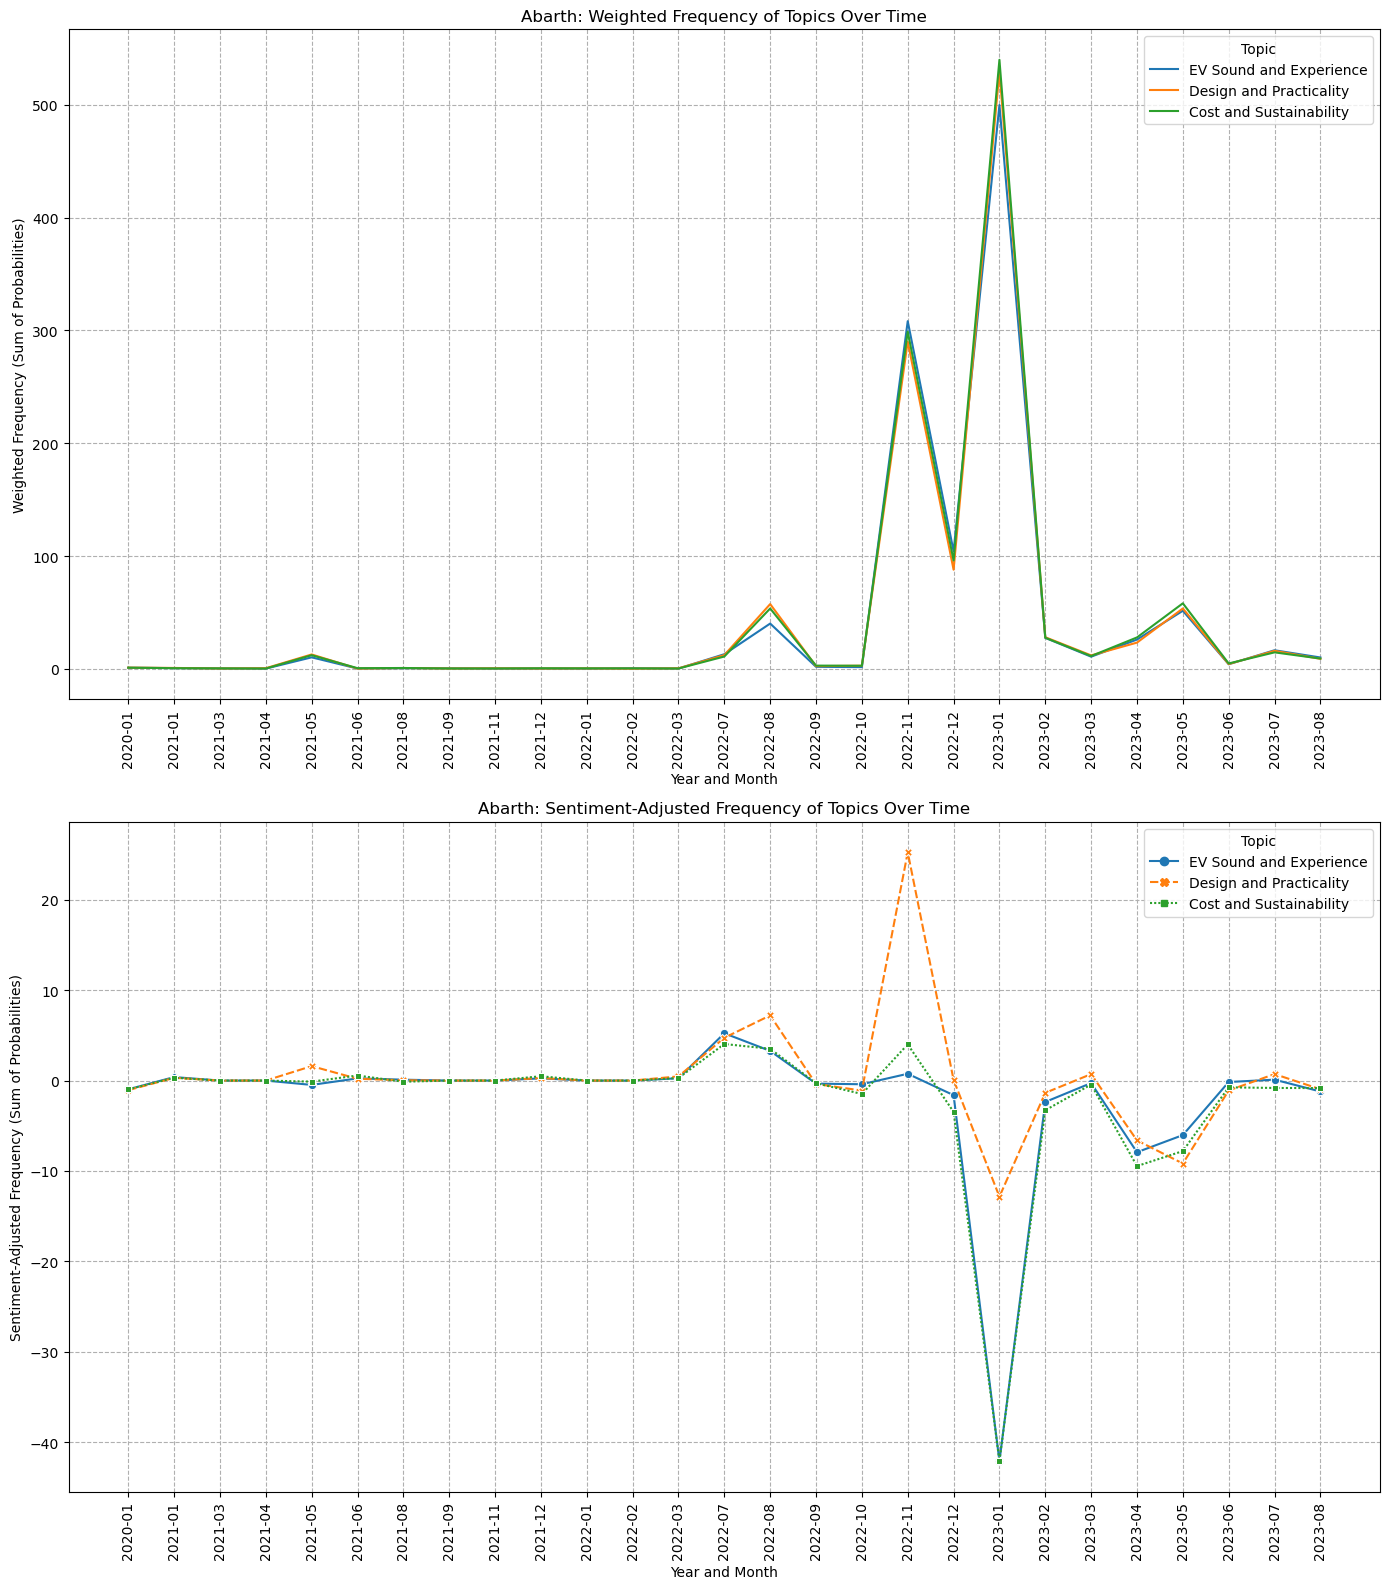

In [ ]:
topic_names_abarth = {
    0: 'EV Sound and Experience',
    1: 'Design and Practicality',
    2: 'Cost and Sustainability'
}

topic_counts_by_year_Abarth['Topic'] = topic_counts_by_year_Abarth['Topic'].replace(topic_names_abarth)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Abarth, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Abarth: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Abarth, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Abarth: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Fiat

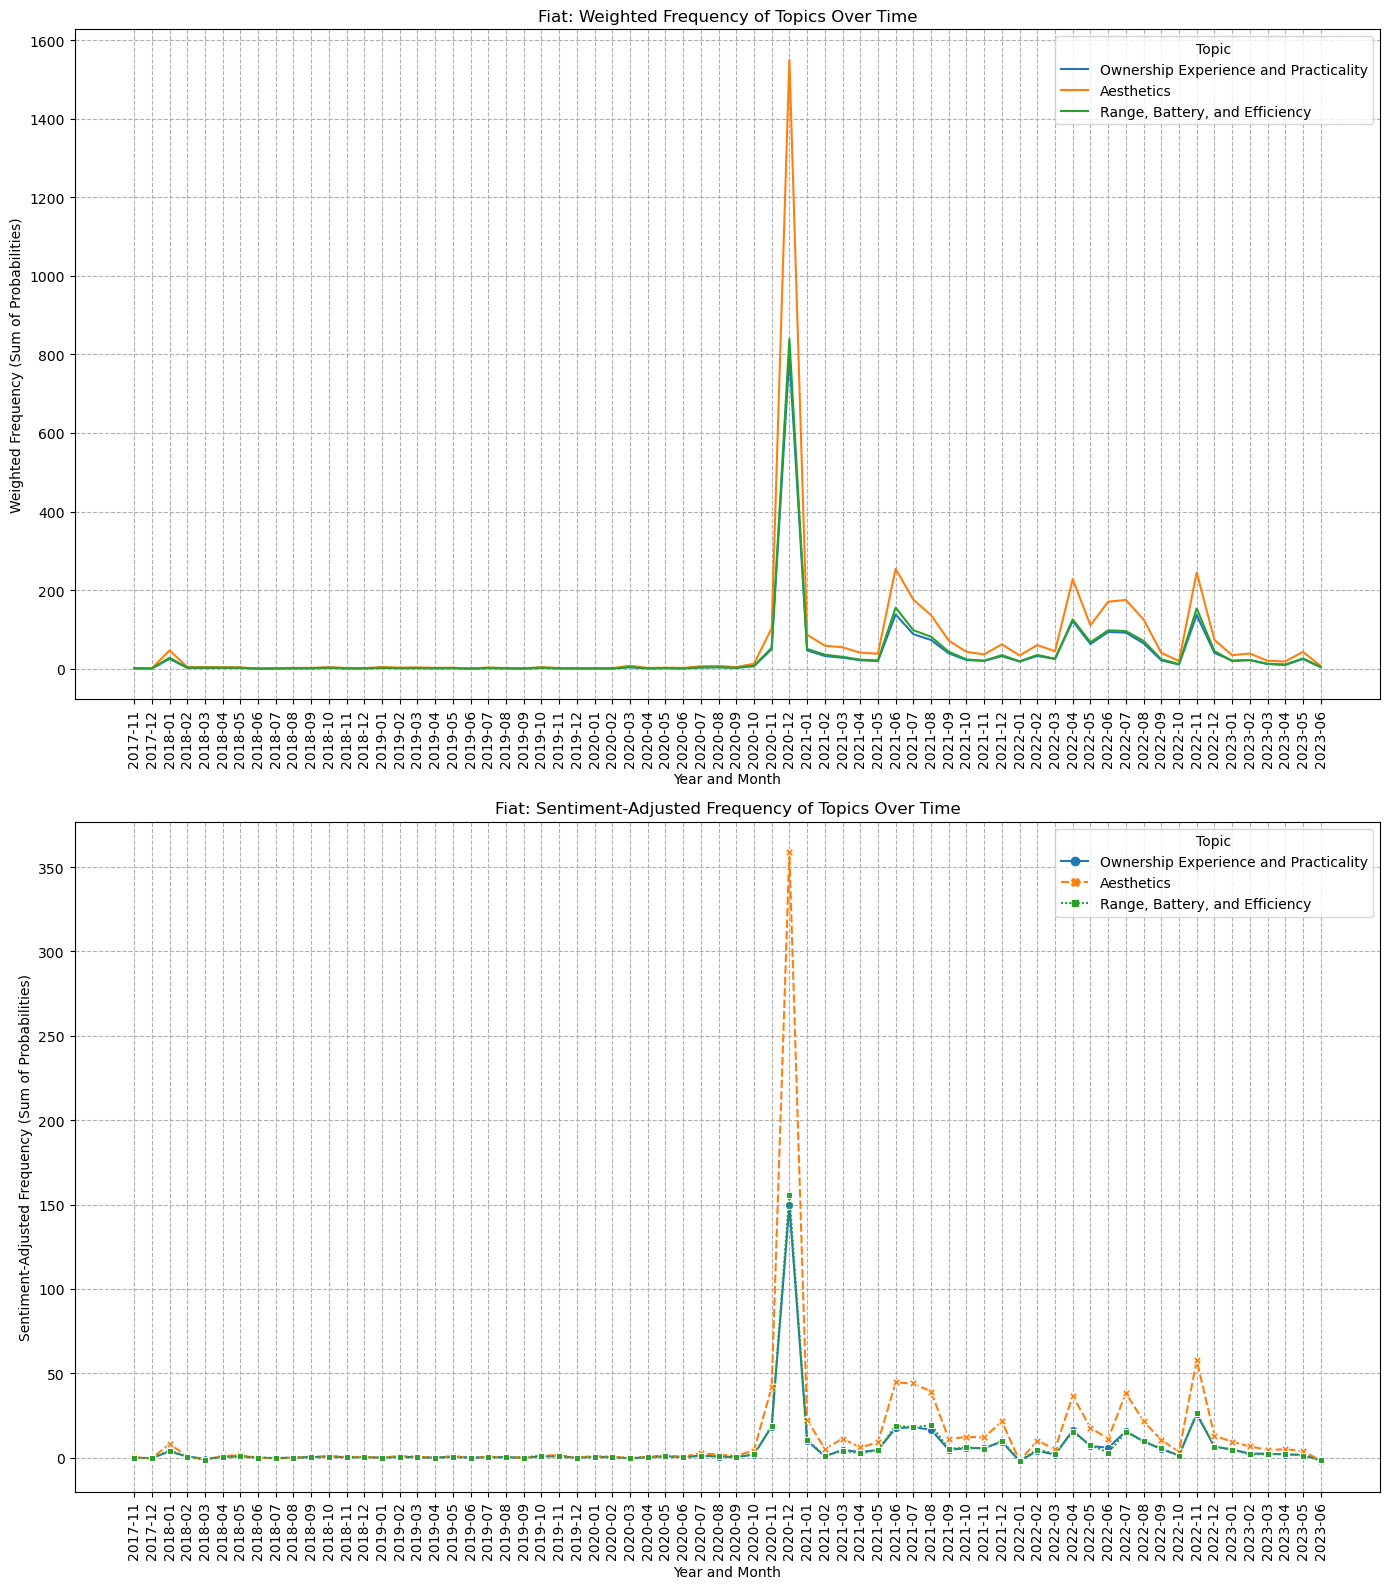

In [ ]:
topic_names_Fiat = {
     0: 'Ownership Experience and Practicality',
     1: 'Aesthetics',
     2: 'Range, Battery, and Efficiency'
}

topic_counts_by_year_Fiat['Topic'] = topic_counts_by_year_Fiat['Topic'].replace(topic_names_Fiat)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Fiat, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Fiat: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Fiat, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Fiat: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Tesla

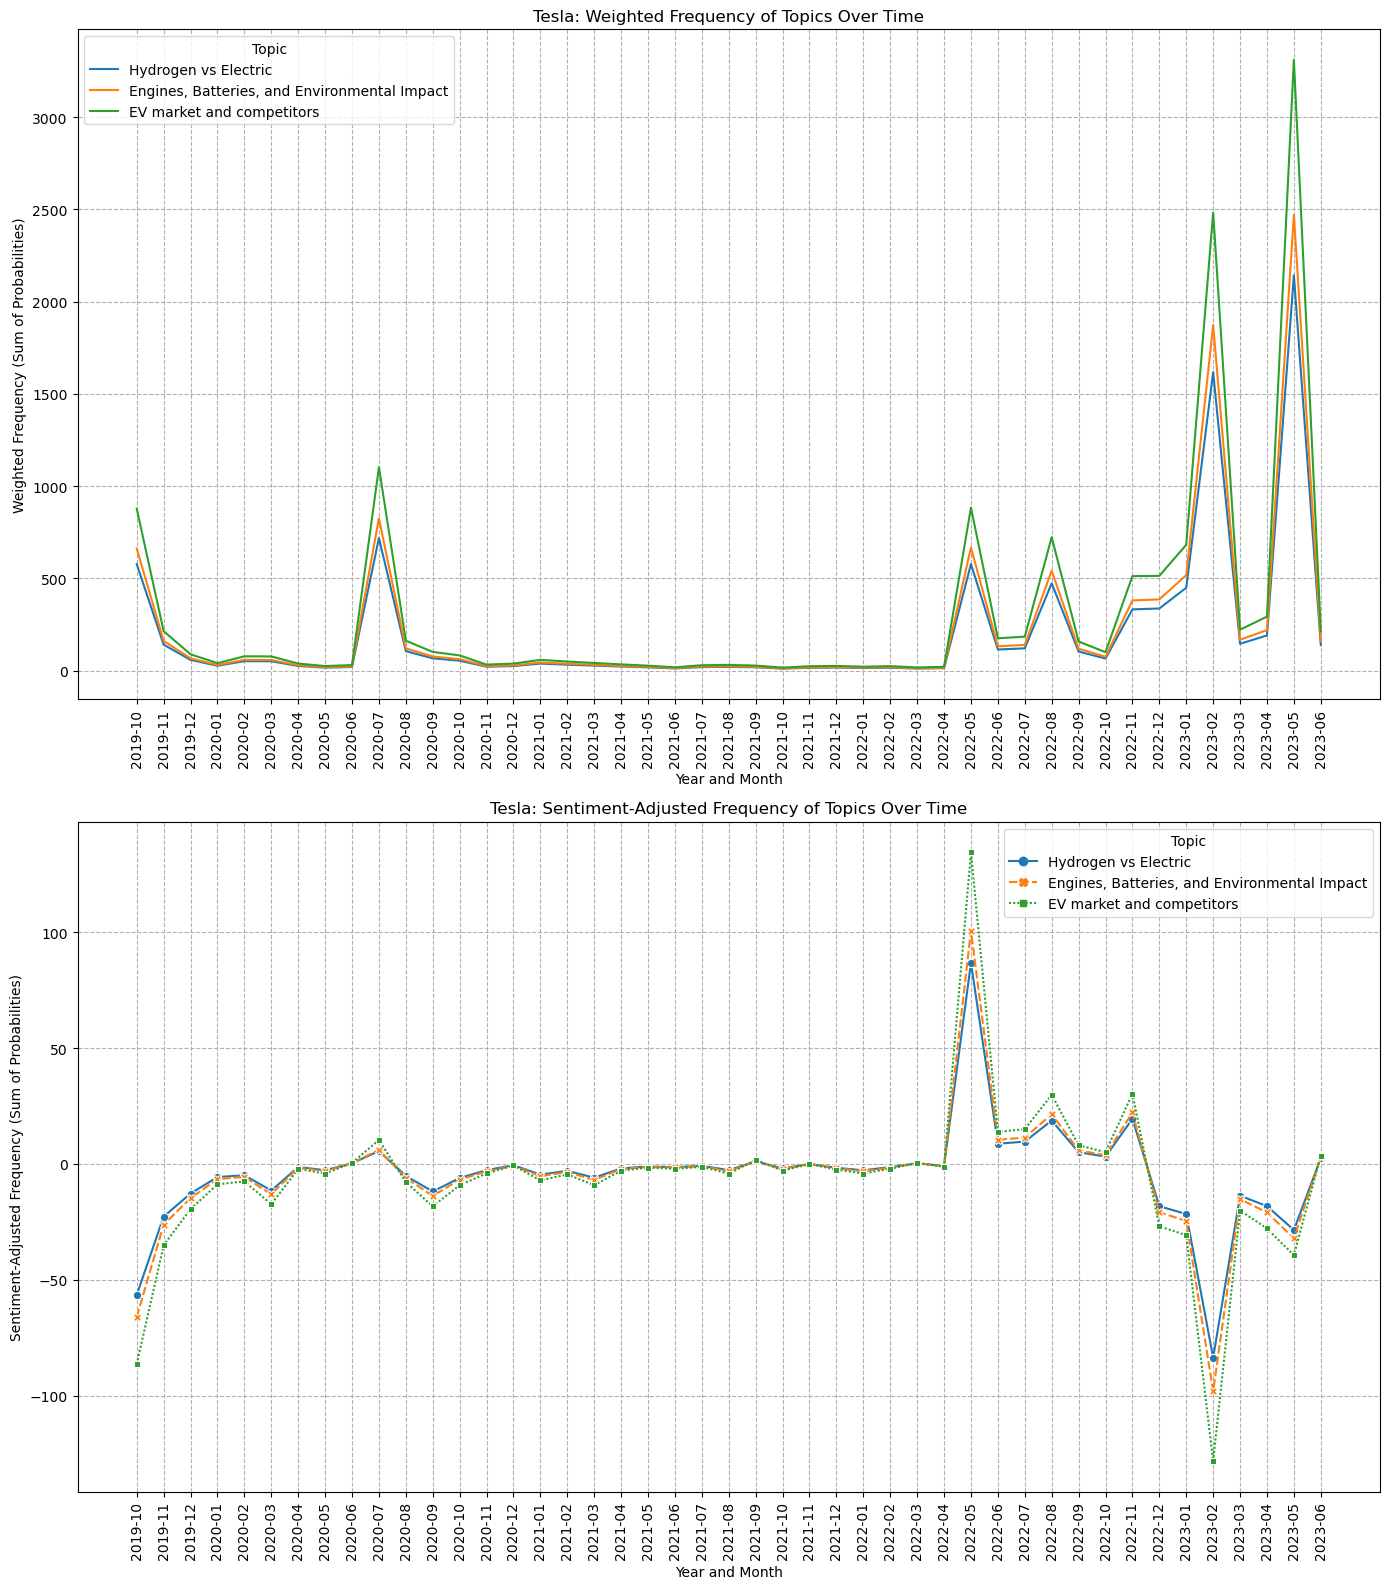

In [ ]:
topic_names_Tesla = {
    0: 'Hydrogen vs Electric',
    1: 'Engines, Batteries, and Environmental Impact',
    2: 'EV market and competitors'
}

topic_counts_by_year_Tesla['Topic'] = topic_counts_by_year_Tesla['Topic'].replace(topic_names_Tesla)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Tesla, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Tesla: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Tesla, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Tesla: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Mini

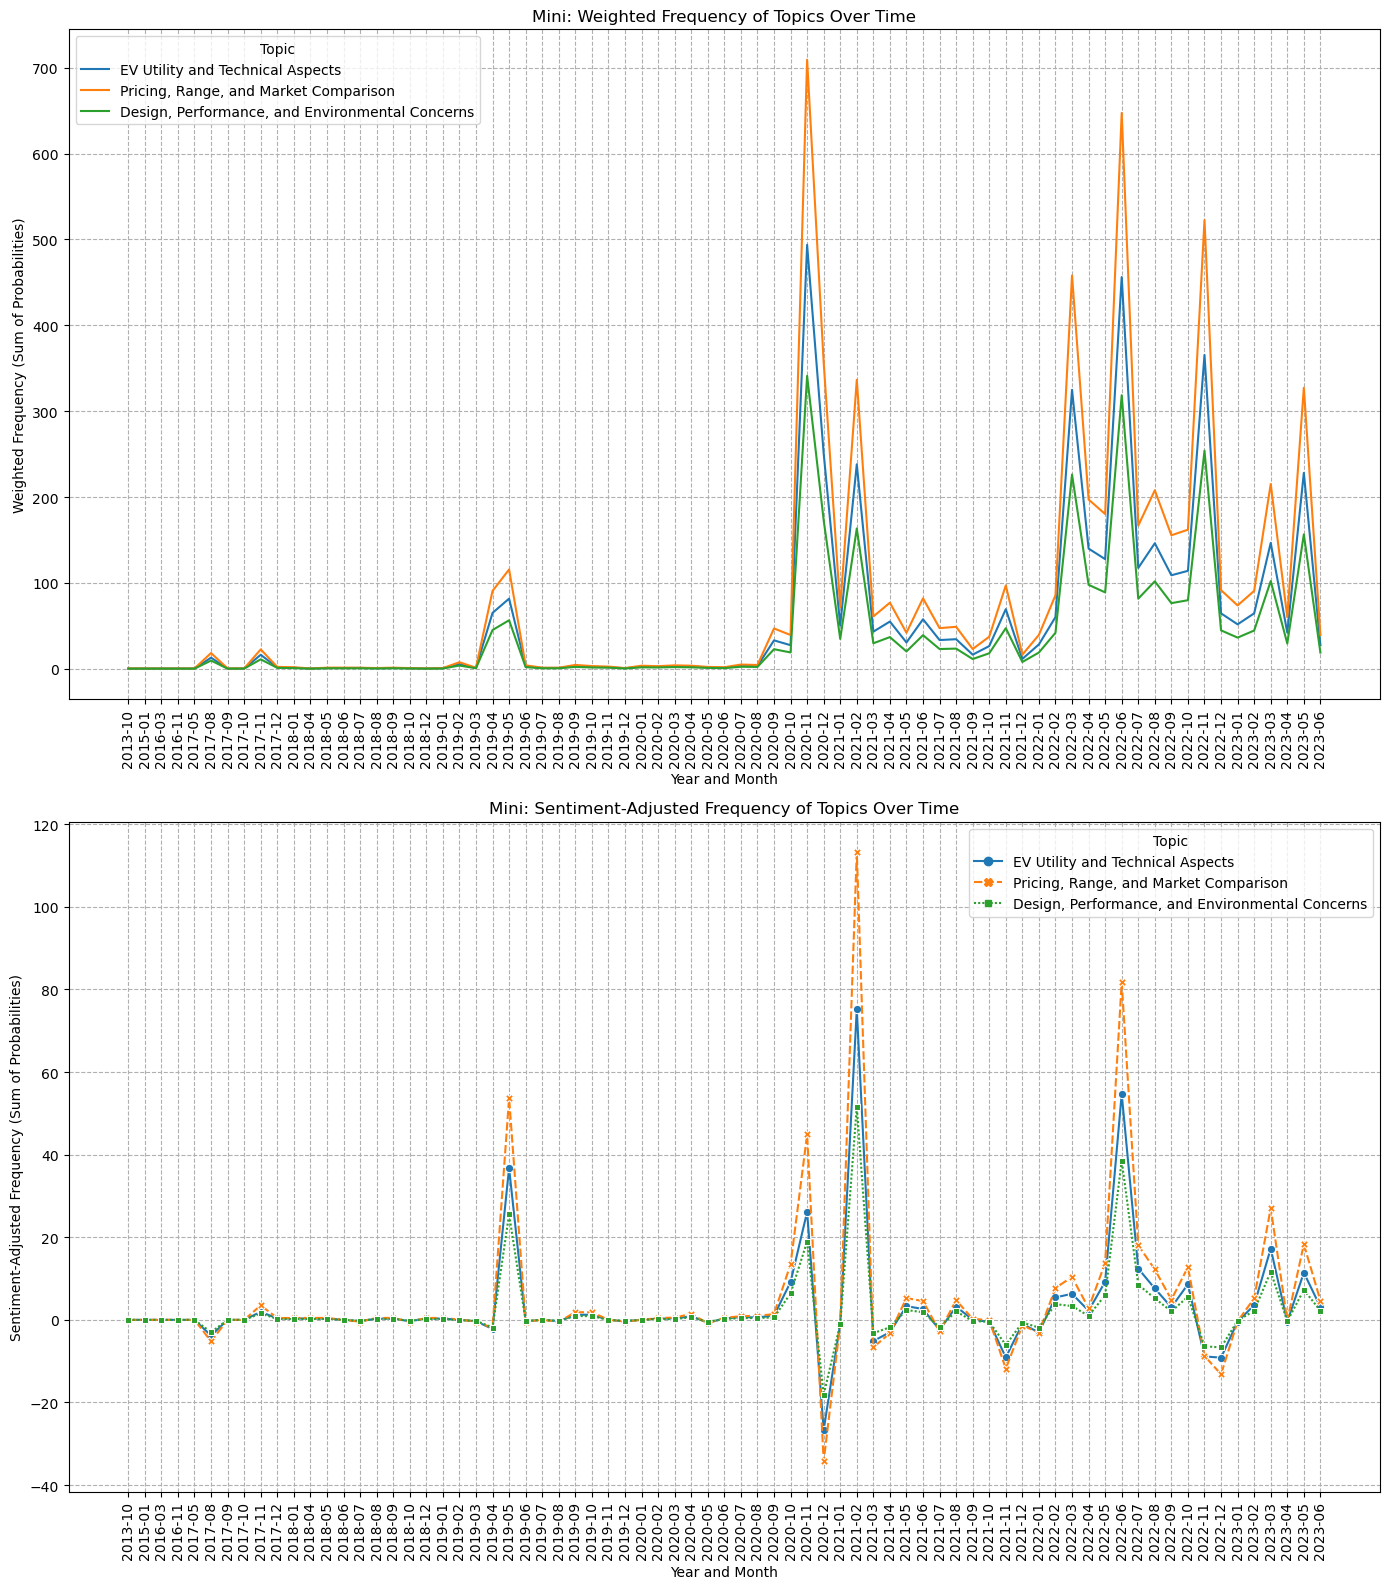

In [20]:
topic_names_Mini = {
    0: 'EV Utility and Technical Aspects',
    1: 'Pricing, Range, and Market Comparison',
    2: 'Design, Performance, and Environmental Concerns'
}

topic_counts_by_year_Mini['Topic'] = topic_counts_by_year_Mini['Topic'].replace(topic_names_Mini)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Mini, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Mini: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Mini, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Mini: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Volkswagen

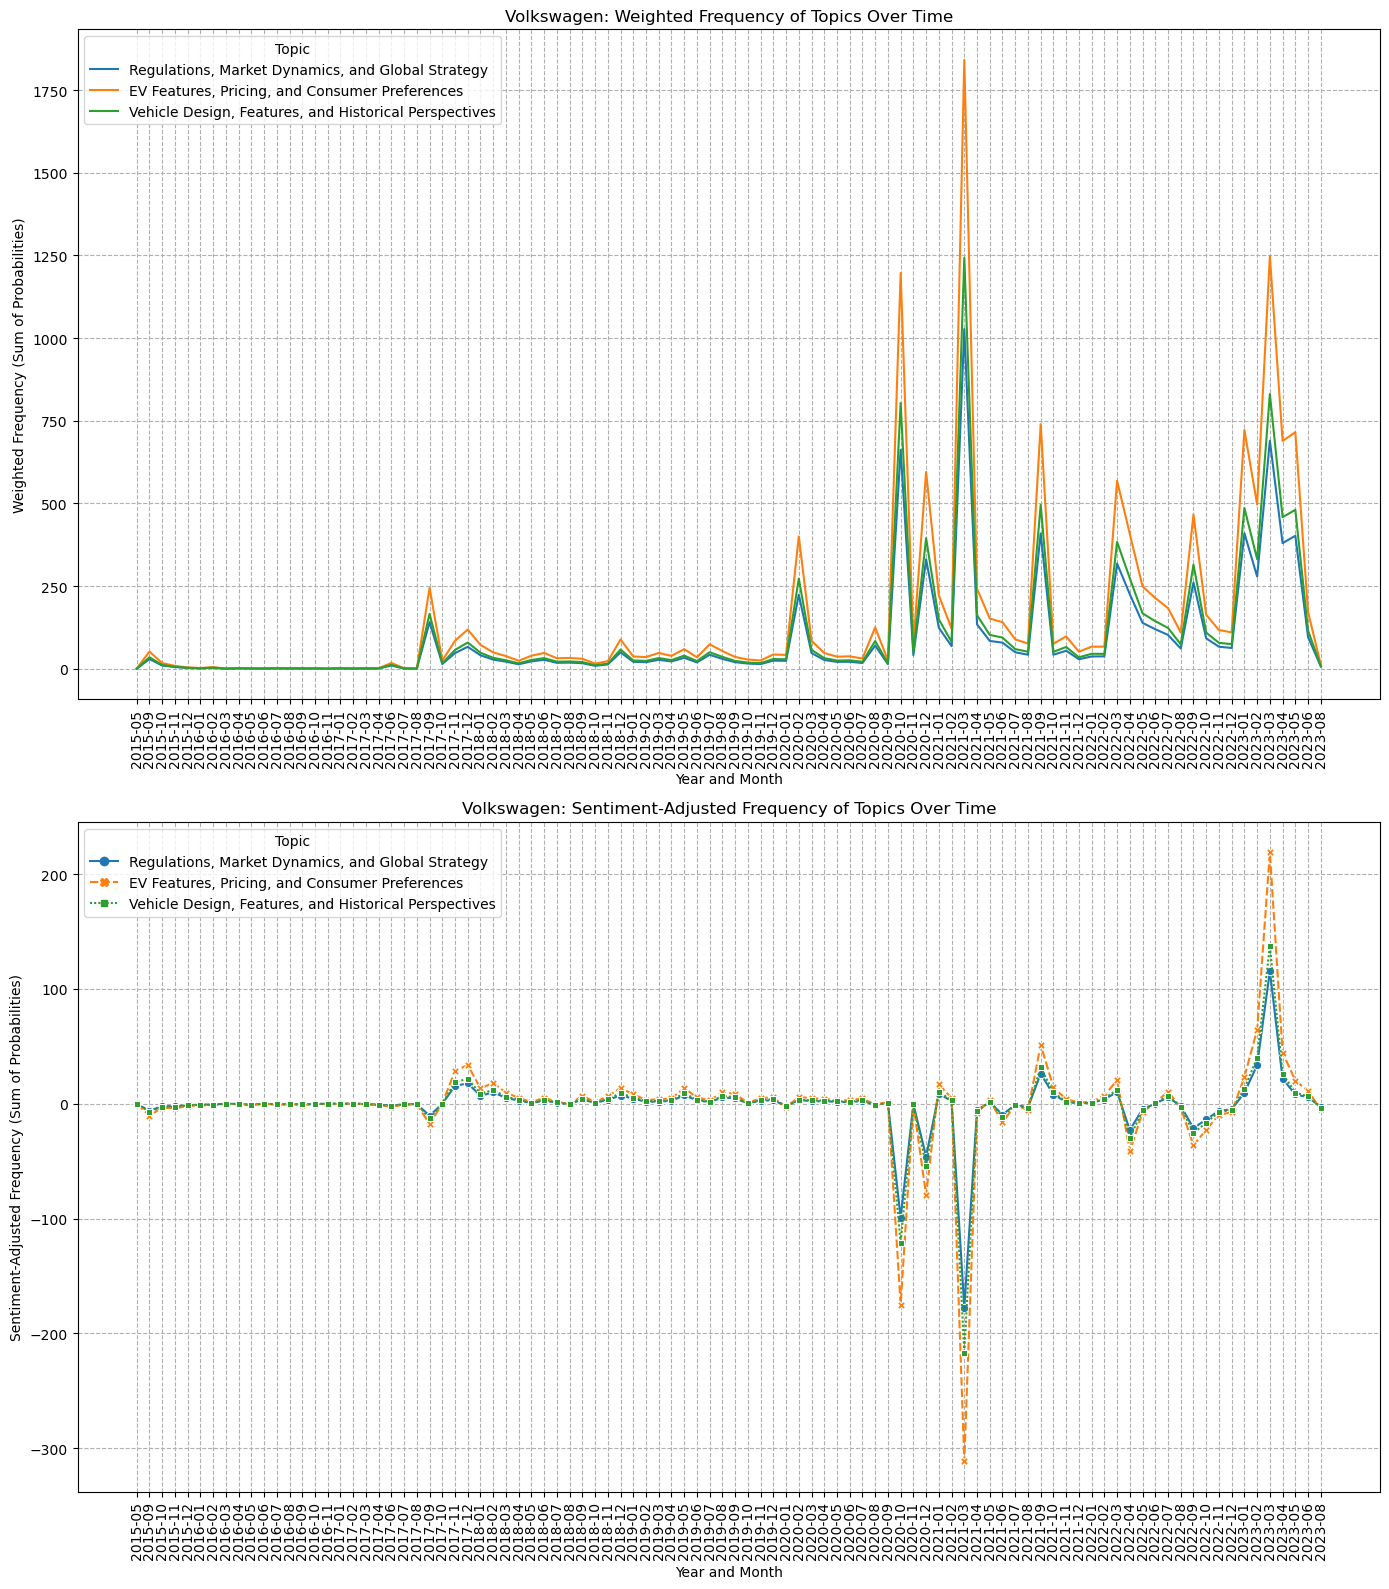

In [ ]:
topic_names_Volk = {
   0: 'Regulations, Market Dynamics, and Global Strategy',
   1: 'EV Features, Pricing, and Consumer Preferences',
   2: 'Vehicle Design, Features, and Historical Perspectives'
}

topic_counts_by_year_Volkswagen['Topic'] = topic_counts_by_year_Volkswagen['Topic'].replace(topic_names_Volk)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Volkswagen, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Volkswagen: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Volkswagen, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Volkswagen: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Peugeot

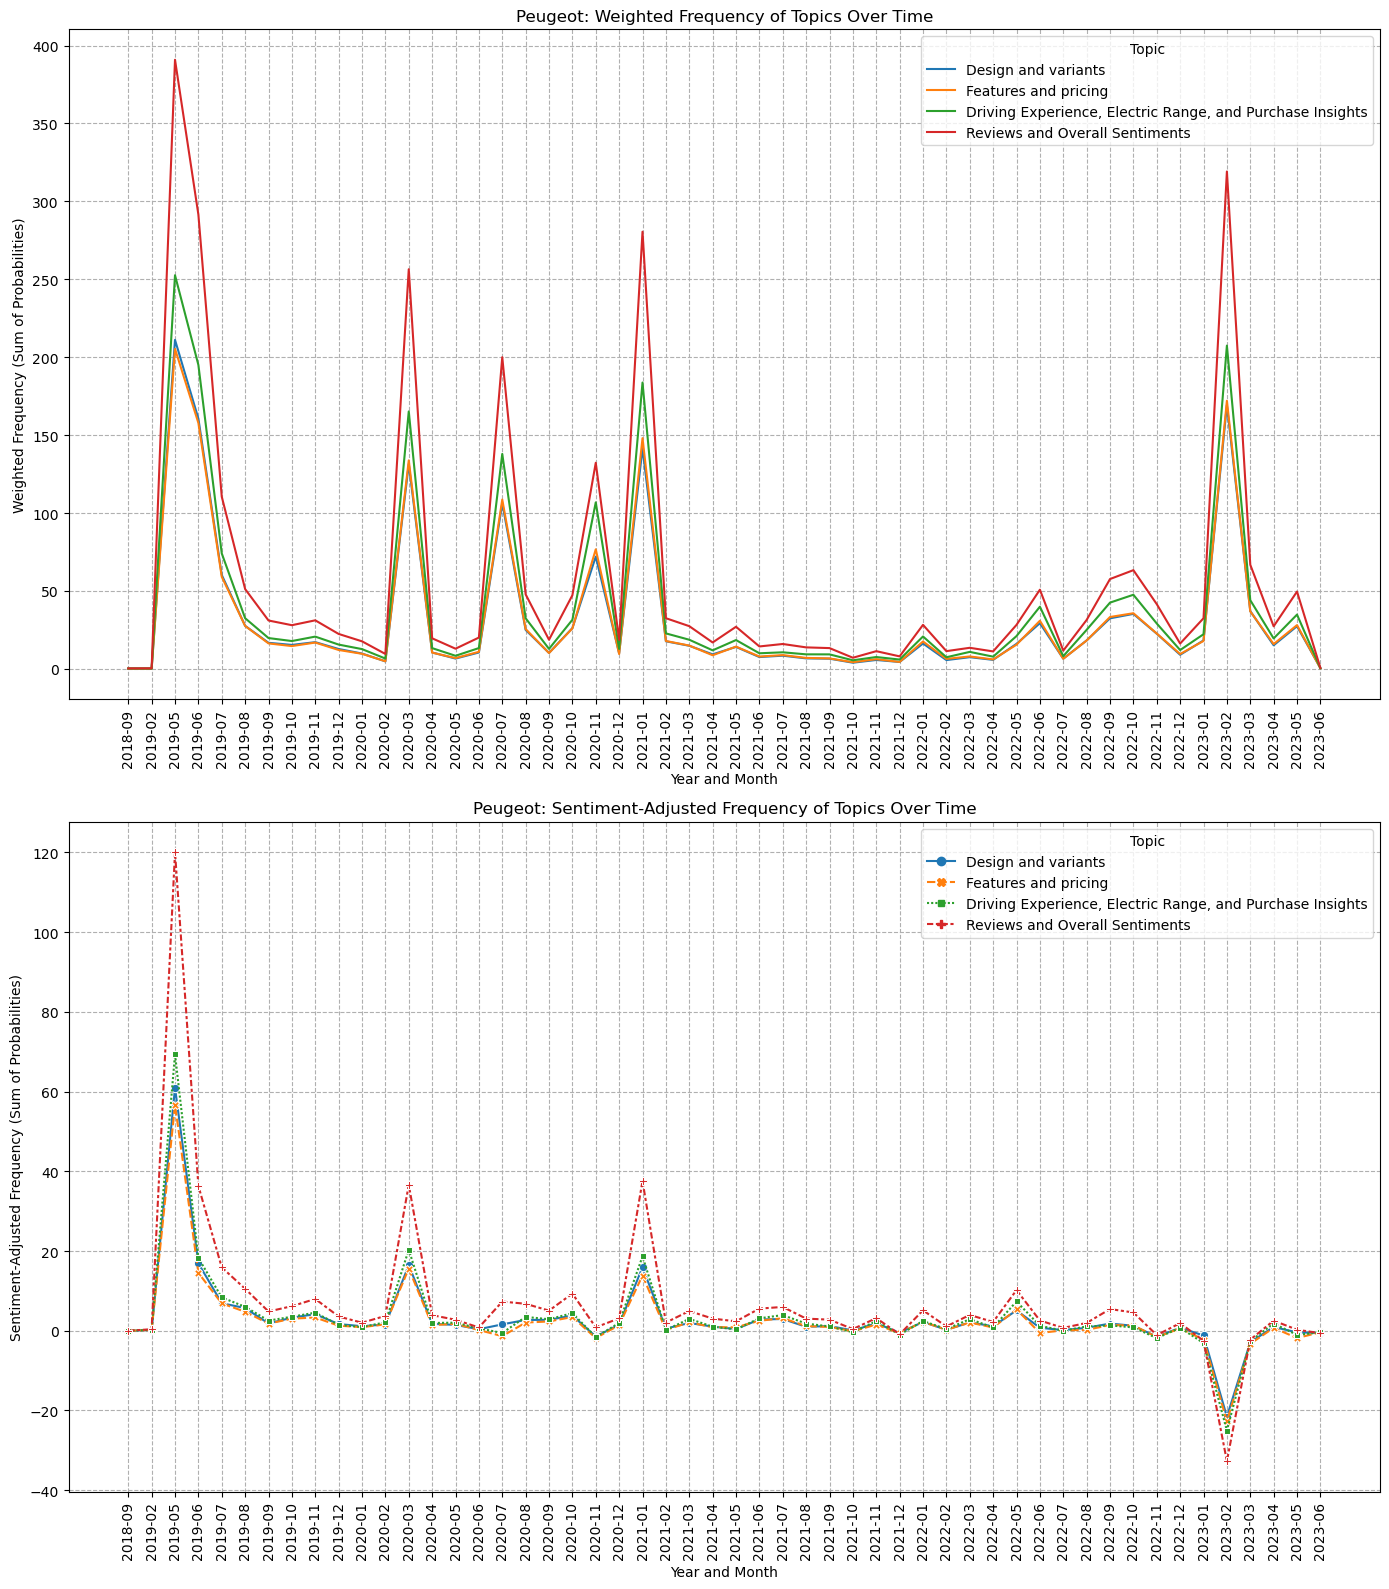

In [19]:
topic_names_Peugeot = {
  0: 'Design and variants',
  1: 'Features and pricing',
  2: 'Driving Experience, Electric Range, and Purchase Insights',
  3: 'Reviews and Overall Sentiments'
}

topic_counts_by_year_Peugeot['Topic'] = topic_counts_by_year_Peugeot['Topic'].replace(topic_names_Peugeot)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot the sum of probabilities for each topic
sns.lineplot(ax=axes[0], data=topic_counts_by_year_Peugeot, x='Year_Month', y='Sum_Probability', hue='Topic', legend='full')
axes[0].set_title('Peugeot: Weighted Frequency of Topics Over Time')
axes[0].set_xlabel('Year and Month')
axes[0].set_ylabel('Weighted Frequency (Sum of Probabilities)')
axes[0].grid(True, linestyle='--')
axes[0].legend(title='Topic')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot the sum of sentiment-adjusted probabilities for each topic
sns.lineplot(ax=axes[1], data=topic_counts_by_year_Peugeot, x='Year_Month', y='Sum_Sentiment_Adjusted_Prob', hue='Topic', legend='full', style='Topic', dashes=True, markers=True)
axes[1].set_title('Peugeot: Sentiment-Adjusted Frequency of Topics Over Time')
axes[1].set_xlabel('Year and Month')
axes[1].set_ylabel('Sentiment-Adjusted Frequency (Sum of Probabilities)')
axes[1].grid(True, linestyle='--')
axes[1].legend(title='Topic')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

References:

```
@inproceedings{camacho-collados-etal-2022-tweetnlp,
    title = "{T}weet{NLP}: Cutting-Edge Natural Language Processing for Social Media",
    author = "Camacho-collados, Jose  and
      Rezaee, Kiamehr  and
      Riahi, Talayeh  and
      Ushio, Asahi  and
      Loureiro, Daniel  and
      Antypas, Dimosthenis  and
      Boisson, Joanne  and
      Espinosa Anke, Luis  and
      Liu, Fangyu  and
      Mart{\'\i}nez C{\'a}mara, Eugenio" and others,
    booktitle = "Proceedings of the 2022 Conference on Empirical Methods in Natural Language Processing: System Demonstrations",
    month = dec,
    year = "2022",
    address = "Abu Dhabi, UAE",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2022.emnlp-demos.5",
    pages = "38--49"
}

@inproceedings{loureiro-etal-2022-timelms,
    title = "{T}ime{LM}s: Diachronic Language Models from {T}witter",
    author = "Loureiro, Daniel  and
      Barbieri, Francesco  and
      Neves, Leonardo  and
      Espinosa Anke, Luis  and
      Camacho-collados, Jose",
    booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics: System Demonstrations",
    month = may,
    year = "2022",
    address = "Dublin, Ireland",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2022.acl-demo.25",
    doi = "10.18653/v1/2022.acl-demo.25",
    pages = "251--260"
}

```